# Exploratory analysis

## Depreciation

In [1]:
# load packages
import pandas as pd

In [2]:
# pull in depreciation summary (filtered R2 > 0.67) and plot best and worst
depr_summary = pd.read_csv('../data/depr_summary_filtered.csv')
model_counts = pd.read_csv('../data/make_model_list_sorted.csv')
depr_summary_all = pd.read_csv('../data/depreciation/depreciation_by_model.csv')

In [3]:
# get top ten models by half life
top_ten = depr_summary.sort_values('Half life', ascending=False)[:10]

# get select columns and rename them 
top_ten_1 = top_ten[['Make', 'Model', 'Fit_age_a', 'Fit_age_b', 'Fit_age_R2', 'Half life']]
top_ten_2 = top_ten_1.rename(columns={'Fit_age_a': 'New price ($)',
                             'Fit_age_b': 'Decay coeff. (1/y)',
                             'Fit_age_R2': 'Fit quality, R2',
                             'Half life': 'Half life (y)'})

In [4]:
# top_ten_2 = top_ten_2[top_ten_2['Make'] != 'Chrysler']

In [5]:
# round numerical data for readability 
top_ten_2['New price ($)'] = round(top_ten_2['New price ($)'], -2)
top_ten_2['Fit quality, R2'] = round(top_ten_2['Fit quality, R2'],3)
top_ten_2['Decay coeff. (1/y)'] = round(top_ten_2['Decay coeff. (1/y)'],3)
top_ten_2['Half life (y)'] = round(top_ten_2['Half life (y)'],2)
top_ten_2.style.hide()

Make,Model,New price ($),Decay coeff. (1/y),"Fit quality, R2",Half life (y)
MAZDA,MX-5 Miata,27500.000000,0.071000,0.820000,9.710000
Toyota,Tacoma,35800.000000,0.076000,0.828000,9.140000
Nissan,Frontier,26200.000000,0.082000,0.818000,8.480000
Jeep,Wrangler,44800.000000,0.084000,0.776000,8.300000
Ford,F450,62000.000000,0.090000,0.743000,7.710000
Nissan,370Z,37000.000000,0.092000,0.722000,7.520000
Ford,F250,53800.000000,0.093000,0.755000,7.490000
Honda,Fit,19200.000000,0.093000,0.911000,7.490000
GMC,Sierra 2500,61700.000000,0.093000,0.759000,7.450000
Toyota,4Runner,43200.000000,0.099000,0.915000,7.030000


In [6]:
# get bottom ten models by half life
bot_ten = depr_summary.sort_values('Half life', ascending=True)[:10]

# get select columns and rename them 
bot_ten_1 = bot_ten[['Make', 'Model', 'Fit_age_a', 'Fit_age_b', 'Fit_age_R2', 'Half life']]
bot_ten_2 = bot_ten_1.rename(columns={'Fit_age_a': 'New price ($)',
                             'Fit_age_b': 'Decay coeff. (1/y)',
                             'Fit_age_R2': 'Fit quality, R2',
                             'Half life': 'Half life (y)'})

In [7]:
# round numerical data for readability 
bot_ten_2['New price ($)'] = round(bot_ten_2['New price ($)'], -2)
bot_ten_2['Fit quality, R2'] = round(bot_ten_2['Fit quality, R2'],3)
bot_ten_2['Decay coeff. (1/y)'] = round(bot_ten_2['Decay coeff. (1/y)'],3)
bot_ten_2['Half life (y)'] = round(bot_ten_2['Half life (y)'],2)
bot_ten_2.style.hide()

Make,Model,New price ($),Decay coeff. (1/y),"Fit quality, R2",Half life (y)
Nissan,Leaf,51800.000000,0.326000,0.869000,2.120000
Chrysler,Pacifica,43500.000000,0.287000,0.711000,2.420000
Porsche,Panamera,183800.000000,0.252000,0.752000,2.750000
Volkswagen,e-Golf,44700.000000,0.249000,0.928000,2.780000
Audi,A8,104100.000000,0.240000,0.943000,2.890000
Audi,A6,67000.000000,0.228000,0.923000,3.030000
Mercedes-Benz,GLE 350,62900.000000,0.221000,0.924000,3.140000
Mercedes-Benz,GLS 450,85200.000000,0.220000,0.737000,3.150000
Lincoln,Navigator,92700.000000,0.215000,0.852000,3.220000
Mercedes-Benz,CLS 550,96600.000000,0.211000,0.773000,3.290000


In [8]:
# join full depreciation data with model counts, save .csv
model_counts_2 = model_counts.groupby('Model').sum()
full_data_set = depr_summary_all.drop(columns=['Body']).merge(model_counts_2, how='inner', on='Model').drop(columns=['index'])
# len(full_data_set)
# depr_summary_all[:25]
full_data_set_clean = full_data_set.rename(columns={"Fit_age_a": "New Price", 
                                                    "Fit_age_b": "Decay Coeff",
                                                    "Fit_age_R2": "Fit R2",
                                                    "Half life": "Half-life",
                                                    "Count": "Listings"})
full_data_set_clean_2 = full_data_set_clean.round({'Decay Coeff': 3,
                                                   'Fit R2': 3, 
                                                   'Half-life': 2})
full_data_set_clean_2['New Price'] = full_data_set_clean_2['New Price'].astype(int)
#full_data_set_clean_3 = full_data_set_clean_2.sort_values(by=['Make', 'Model'])
full_data_set_clean_3 = full_data_set_clean_2.sort_values(by=['Make_x', 'Model'])

full_data_set_clean_3.to_csv('../data/full_data.csv', index=False)

In [9]:
# pull in empirical data and data predicted from models
pred_data = pd.read_csv('../data/depreciation/pred_data_2.csv').drop(columns=['Age'])
emp_data = pd.read_csv('../data/depreciation/emp_data_2.csv').drop(columns=['Age'])

In [10]:
diffs = emp_data - pred_data
n_models = 150
n_years = 25
diffs_selected = diffs.iloc[:n_years,:n_models]
diffs_selected_norm = diffs_selected/emp_data.iloc[0,:n_models]
diffs_selected_norm_avg = diffs_selected_norm.mean(axis=1)
diffs_selected_norm_25 = diffs_selected_norm.quantile(.25,axis=1)
diffs_selected_norm_75 = diffs_selected_norm.quantile(.75,axis=1)

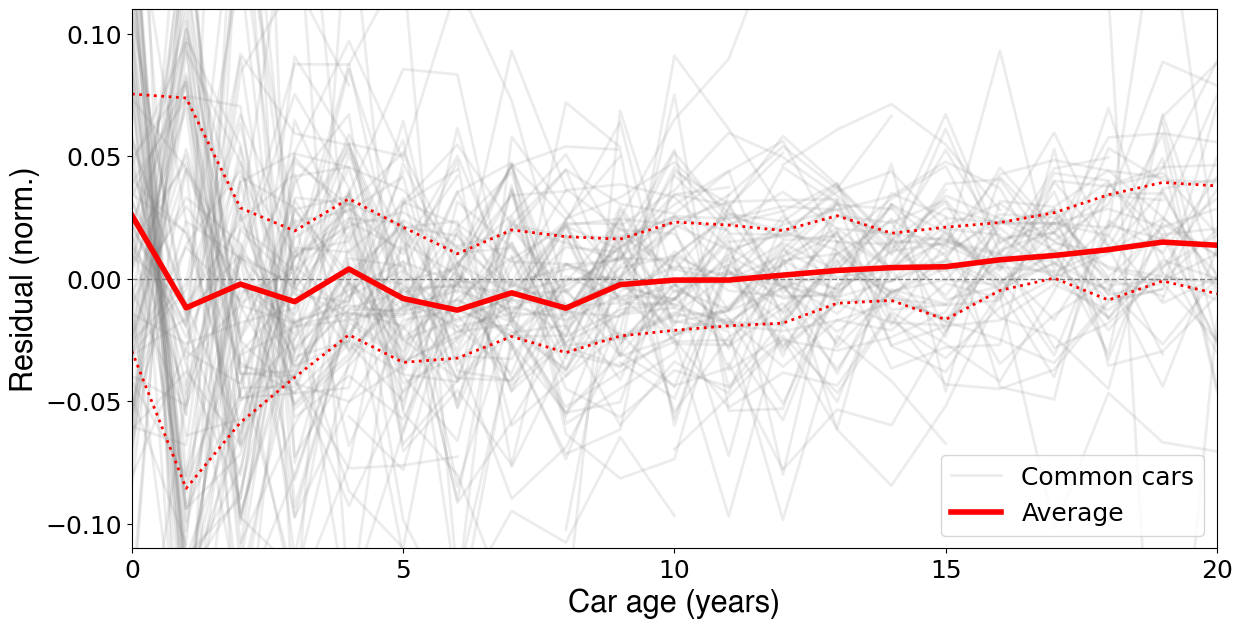

In [11]:
# plot data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(14,7))
ax.plot(diffs_selected_norm.iloc[:,0], color='gray', linewidth=2, alpha=0.15, label='Common cars')
ax.plot(diffs_selected_norm.iloc[:,1:], color='gray', linewidth=2, alpha=0.15, label='_nolegend_')

# plot average and quantiles
ax.plot(diffs_selected_norm_avg, color='red', linewidth=4, linestyle='-', label='Average')
ax.plot(diffs_selected_norm_25, color='red', linewidth=2, linestyle=':')
ax.plot(diffs_selected_norm_75, color='red', linewidth=2, linestyle=':')

plt.xlabel('Car age (years)', fontsize = 22, fontname = 'Helvetica')

# Plot Median list price - predicted price) / median new car price
plt.ylabel('Residual (norm.)', fontsize = 22, fontname = 'Helvetica')
# plt.title('Model ', fontsize = 20, fontname = 'Helvetica')
ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 18)
plt.axhline(linewidth=1, color='gray', linestyle='--', zorder = 0)
plt.xlim(0,20)
plt.ylim(-0.11, 0.11)
plt.legend(fontsize=18, loc='lower right')
plt.xticks(range(0,21,5))
plt.yticks([-0.10, -0.05, 0, 0.05, 0.10])
# plt.savefig('../images/Prediction_error.png', dpi = 150)
plt.show()

In [12]:
# get number of years for each car
listings_all = pd.read_csv('../data/listings5.csv')
model_year_counts = listings_all.groupby('Model').Year.nunique().to_frame()
# model_year_counts

In [13]:
# join year counts with depreciation summary
depr_model_year_counts_temp = depr_summary.merge(model_year_counts, on='Model')
depr_model_year_counts = depr_model_year_counts_temp[['Make', 'Model', 'Year', 'Half life']]
# depr_model_year_counts.sort_values('Year')[130:170].sort_values('Half life')
depr_model_year_counts.to_csv('../data/depr_model_year_counts.csv')

0.09928160483494947 3.390091008260477 0.5075048908602295 4.836064543022979e-13 0.01270581561847731


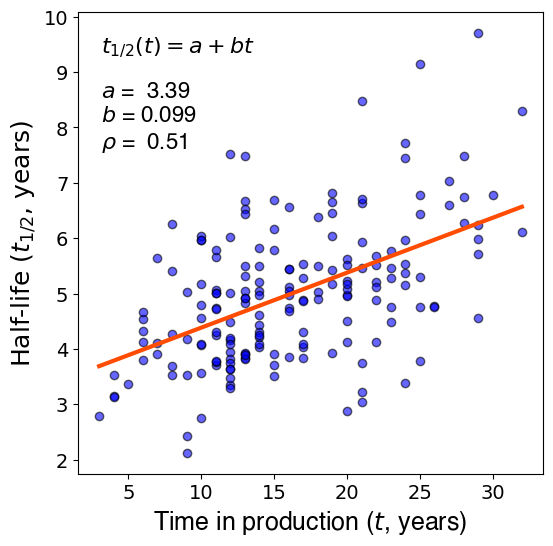

In [14]:
# plot half life versus time in production
fig, ax = plt.subplots(1, 1, figsize=(6,6))

x = depr_model_year_counts['Year']
y = depr_model_year_counts['Half life']

ax.scatter(x, y, edgecolor='black', facecolor='blue', alpha=0.6)

import numpy as np
fit = np.polyfit(x, y, 1, full=True)
# print(fit)

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept, r_value, p_value, std_err)

ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), '#ff4c00', linewidth=3)

# set up text box
props_1 = dict(facecolor='white', edgecolor='none', alpha=0.67)

textbox_1 = r'$t_{1/2}(t) = a + bt$'
textbox_2 = '$a$ = %5.2f \n$b$ = %0.3f' % (intercept, slope) + '\n' + r'$\rho$ = %5.2f' % r_value

ax.text(0.05, 0.95, textbox_1, transform = ax.transAxes, fontsize = 16, 
        fontname = 'Helvetica', verticalalignment = 'top', bbox = props_1)

ax.text(0.05, 0.85, textbox_2, transform = ax.transAxes, fontsize = 16, 
        fontname = 'Helvetica', verticalalignment = 'top', bbox = props_1)

xlabel = r'Time in production ($\it{t}$, years)'
ylabel = r'Half-life ($\it{t}_{1/2}$, years)' 

plt.xlabel(xlabel, fontsize = 18, fontname = 'Helvetica')
plt.ylabel(ylabel, fontsize = 18)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)

plt.savefig('../images/Time_in_production.png', dpi = 300)

plt.show()

In [15]:
price_depr = depr_summary[['Make', 'Model', 'Fit_age_a', 'Half life']]
price_depr

,Make,Model,Fit_age_a,Half life
0,Acura,ILX,30777.77496,5.411008
1,Acura,MDX,55726.29916,4.124596
2,Acura,TSX,32150.62084,5.654425
3,Acura,TLX,35871.65508,4.533671
4,Acura,RDX,42559.08885,4.439502
...,...,...,...,...
173,Volkswagen,Passat,23581.24099,5.680099
174,Volvo,XC60,52543.22897,3.775834
175,Volvo,XC90,61324.75650,3.831457
176,Volvo,S60,44250.20837,3.922299


-2.3155379721451908e-05 6.07414923539597 -0.46327879321090626 7.428191870465558e-11 3.3388051116796983e-06


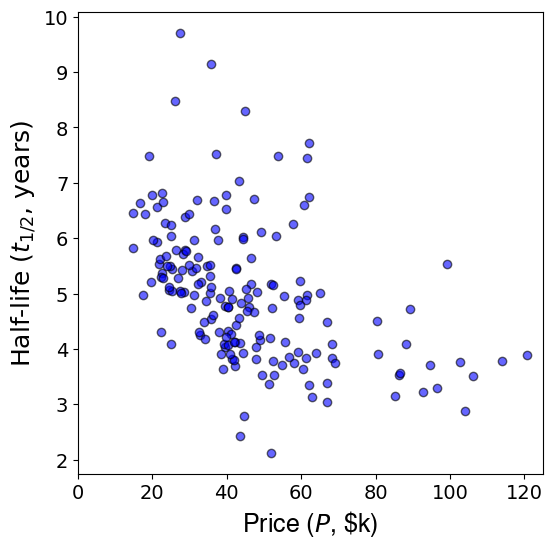

In [16]:
# plot depreciation vs new price
fig, ax = plt.subplots(1, 1, figsize=(6,6))

x = price_depr['Fit_age_a']
y = price_depr['Half life']

ax.scatter(x, y, edgecolor='black', facecolor='blue', alpha=0.6)
# ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), '#ff4c00', linewidth=3)

plt.xlim(0,125000)

xlabel = r'Price ($\it{P}$, \$k)' 
ylabel = r'Half-life ($\it{t}_{1/2}$, years)' 
xscale = 1000

plt.xlabel(xlabel, fontsize = 18, fontname = 'Helvetica')
plt.ylabel(ylabel, fontsize = 18)
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)

import matplotlib.ticker as ticker
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/xscale))
ax.xaxis.set_major_formatter(ticks)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(slope, intercept, r_value, p_value, std_err)